In [2]:
# Probability of the Event E: P(E)

# Independent Events: knowing info about event E gives us no info about whether event F will occur
# Probability of flipping a coin twice and getting 2 HEADS:
## 1st flip is HEADS gives us no info about whether the second flip will be HEADS

# Probability of both events occurring is the probability that both events occur:
P(E,F) = P(E)P(F)

    # Probability of 1st flip Heads = 1/2
    # Probability that both flips Tails = 1/2 * 1/2 = 1/4 (Genome box)

# Dependent Events: knowing info about event E gives us info about whether event F will occur:
# Probability of flipping a coin twice and getting 2 HEADS:
## 1st flip is TAILS ==> We immediately know that the probability is 0

    # Probability of first flip Heads AND both flips Tails = 1/2 * 0 = 0

# Dependent / Conditional Probability where P(F) != 0:
# Think of as the Probability that E occurs given that we know event F occurs:
P(E|F) = P(E,F)/P(F)

# We can confirm that thsi would give us soley the P(E) when P(F) is independent of P(F):
# Confirms taht knowing eevnt F occurs gives us no additional info as to whther event E occurs:
P(E|F) = P(E)

# Example: Family with 2 unknown gender children:

# Assume:
# 1. Each child is equally likely to be a girl or a boy: 1/2
# 2. The gender of the second child is INDEPENDENT of the gender of the first child

'''
    b    g

b   bb   bg

g   bg   gg

'''

# Probability of the event "no girls": 1/4
# Probability of THE EVENT 1 boy and 1 girl: 1/2
# Probability of the event "two girls": 1/4

# What is the probability of the event B "both children are girls" conditional on the event G "the older child is a girl": 

#  _(older child is a girl - G) & _ (younger child - either boy or girl - 1/2)

P(B|G) = P(B,G)/P(G) = P(B) / P(G) == P(L) # probabaility the younger child is a girl since we know that the first child is a girl 

# What is the probability of the event B "both children are girls" conditional on the event L "at least one of the children is a girl": 

P(B|L) = P(B,L)/P(L) = P(B) / P(L) = 1/4 / 3/4 = 1/3



SyntaxError: invalid syntax (<ipython-input-2-a192d10fbde6>, line 8)

In [3]:
# Genertae list of families:
from __future__ import division
import random

def random_gender():
    return random.choice(["boy", "girl"])


both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(10000):
    
    younger = random_gender()
    older = random_gender()
    
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

        
# Run calc for P in which older child is a girl and both children are girls: Expected 1/2 outcome
print "P(both | older) girls: ", both_girls / older_girl

# Run calc for P in which at least on of the children is a girl and both children are girls: Expected 1/3 outcome
print "P(both | either) girls: ", both_girls / either_girl

P(both | older) girls:  0.514228456914
P(both | either) girls:  0.341541328364


In [ ]:
# Bayes Theorem: Reverse Conditional Probabilities

# Can be used to calculate the probability for instances we want the reverse of:

# In this case we want to know the P of some event E conditional on event F occuring
# BUT, We only have info on the reverse: P(F) conditional E occurs

# The P of  E dependent on F = P of E * P of F / P of F
# Also equal to P of F dependent on P of E * P of E / P of F
P(E|F) = P(E,F)/P(F) = P(F|E)P(E) / P(F)

# The event F can be split into 2 MUTUALLY EXCLUSIVE Events:
# 1. F and E
# 2. F and NOT E

P(F) = P(F,E) + P(F,!E)

In [2]:
# Random Variables: a variable whose possible outcomes have an associated value equally distributed
# Example 1: Coin flip with Head = 1 and Tails = 0

# Expected value of a random variable: P(Coin flip) = 1/2 = (0 * 1/2 + 1 * 1/2) 

# P(Range(10)) = 4.5 = 0 * 0.1 + 1 * 0.1 + 2 * 0.1 ... 9 * 0.1

# 2 girls example
# X = Random Variable representing the number of girls
# X = 0 with Probability of 1/4 (BB: 2 boys)
# X = 1 with Probabaility of 1/2 (BG or GB: 1 girl)
# X = 2 with Probability of 1/4 (GG: 2 girls)

# Random variable Y: The number of girls conditional on at least 1 of the children is a girl
# 3 possibilities: BG, GB, GG
# Y = 1: Probability of 2/3
# Y = 2: Probability of 1/3

# Z: THE number of girls conditional on the older child being a girl
# 2 Possibilies: GB, GG
# Z = 1: Probability of 1/2
# Z = 2: Probability of 1/2

In [ ]:
# Continuous Distributions:

# Coin flip = Discrete Distribution (Binary outcomes)
# Uniform Distribution: Puts equal weight on all numbers between 0 and 1

# Probability density function (pdf): ALL VALUES EITHER 0 or 1

# Cumulative distribution Function (cdf): gives the prob that a random variable is less than or equal to a certain value

def uniform_pdf(x):
    
    return 1 if x >= 0 else 0

def uniform_cdf(x):
    "returns the prob that a uniform random variable is <= x"
    if x < 0:
        return 0 # uniform random is never less than 0
    elif x < 1:
        return x # ex: P(X <= 0.4) = 0.4
    else:
        return 1 # uniform random is always less than or equal to 1


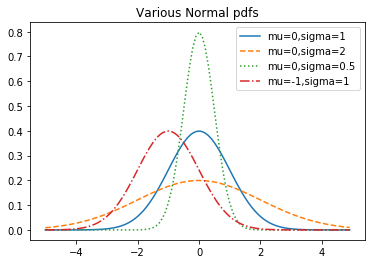

In [4]:
# Normal Distribution:
import math
from matplotlib import pyplot as plt

# Classic Bell Curve determined by the mean and and standard deviation (sigma)
# Mean:determines where the bell curve is centered
# Standard Dev: how wide the bell curve is
# x: random variable

def normal_pdf(x, mu = 0, sigma = 1):
    sqrt_two_pi = math.sqrt(2*math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma **2) / (sqrt_two_pi * sigma))

# -50 to 49 / 10:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1') # Standard normal distribution
plt.plot(xs, [normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs, [normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs, [normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

# If Z is a standard normal random variable then X = sigma*Z + mu
# Thus, Z = (X - mu) / sigma (standard normal variable)


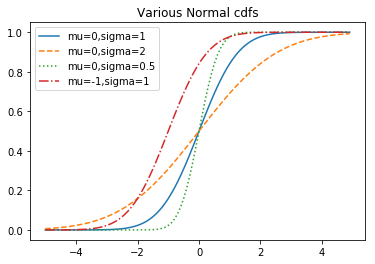

In [5]:
# Normal Distribution:
import math
from matplotlib import pyplot as plt

# Cumulative Distribution Function (cdf):
def normal_cdf(x, mu=0, sigma = 1):
    return (1 + math.erf( (x - mu) / math.sqrt(2) / sigma )) / 2

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1') # Standard normal distribution
plt.plot(xs, [normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs, [normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs, [normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal cdfs")
plt.show()

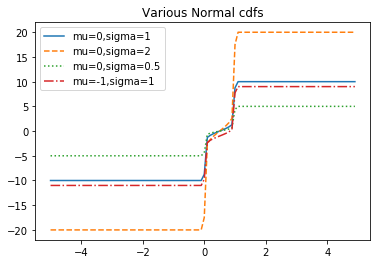

In [6]:
# Sometimes we want to invert normal_cdf to find the value
# corresponding to a specified probability:
# Since the normal_cdf is continuous and strictly increasing we can use binary search to get the inverse:

import math
from matplotlib import pyplot as plt

# This function continues to narrow in on a Z thats close enough to the desired probability: 
# Resembles gradient descent
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approx inverse using binary search"""
    
    # if not standard, compute standard and rescale:
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0 # normal_cdf(-10) is very close to 0
    hi_z, hi_p = 10.0, 1 # normal_cdf(10) is very close to 1
    
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2 # get the midpoint
        mid_p = normal_cdf(mid_z) # get the cdf's value at the midpoint
        
        if mid_p < p:
            # midpoint is still too low, search above it:
            low_z, low_p = mid_z, mid_p
            
        elif mid_p > p:
            # midpoint is still too high, search below it:
            hi_z, hi_p = mid_z, mid_p
        else:
            break
            
    return mid_z


xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [inverse_normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs, [inverse_normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs, [inverse_normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs, [inverse_normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Inverse Normal cdfs")
plt.show()

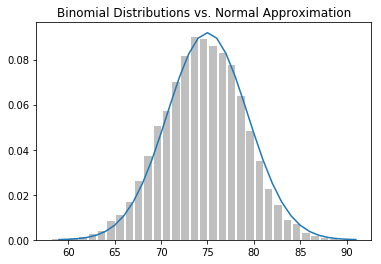

In [11]:
from collections import Counter
import math
from matplotlib import pyplot as plt

# The Central Limit Theorem:
# Makes the Normal Distribution useful:
# A random variable defined as the averge of a large number of independent and identically distributed random variables
# is itself approx NORMALLY DISTRIBUTED:

# If x1 .. xn are random variables with mean mu and standard dev and if n is large then
# 1/n (x1 .. + .. + xn)

# Binomial Random variables: 2 parameters n & p
# A Binomial(n,p) random variable is the sum of n independent Bernoulli(p)
# random variables, each of which has a Probability = 1 
# and probabaility of 1- p = 0

def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

# The mu of a bernoulli(p) variable is p
# Its standarad dviation is math.sqrt(p(1-p))

# The central limit theorme says that as N gets large, the Binomial(n,p) variable
# is approx a normal random variable with mu (mean) = Np 
# and standard dev = math.sqrt(NP(1-p))
def make_hist(p, n, num_points):
    
    data = [binomial(n, p) for _ in range(num_points)]
    
    # Use a bar chart to show the actual binomial samples:
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')
    
    # mean = probability * num
    mu = p * n
    
    sigma = math.sqrt(n * p * (1-p))
    
    # Use a line chart to show the normal approx:
    # x-axis: 
    xs = range(min(data), max(data) + 1)
    
    # y-axis:
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    
    plt.plot(xs, ys)
    plt.title("Binomial Distributions vs. Normal Approximation")
    plt.show()

make_hist(0.75, 100, 10000)